<a href="https://colab.research.google.com/github/Greeshma0212/Exploring-Stock-Market-Data-of-Tesla-and-GameStop/blob/main/Exploring_Stock_Market_Data_of_Tesla_and_GameStop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


In [4]:
import pandas as pd
import os

# Load the CSV using the correct path
csv_path = os.path.join(path, "kc_house_data.csv")
df = pd.read_csv(csv_path)

# Display data types of all columns
print(df.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
# Drop 'id' column only (since 'Unnamed: 0' doesn't exist)
df.drop(columns=['id'], inplace=True)

# Display statistical summary
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Count the number of houses with each unique floor value and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()

# Rename the column for clarity
floor_counts.rename(columns={'floors': 'count'}, inplace=True)

# Display the DataFrame
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


from matplotlib import pyplot as plt
_df_0['floors'].plot(kind='hist', bins=20, title='floors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='floors', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['floors'].plot(kind='line', figsize=(8, 4), title='floors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

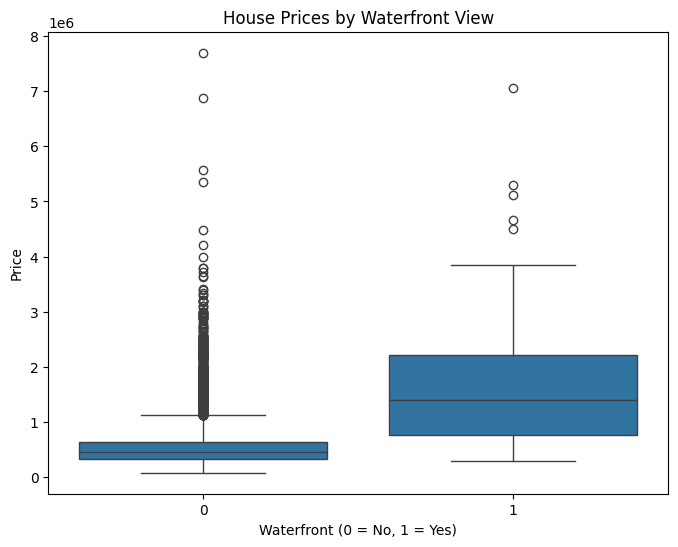

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of price vs waterfront
plt.figure(figsize=(8, 6))
sns.boxplot(x="waterfront", y="price", data=df)

plt.title("House Prices by Waterfront View")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()


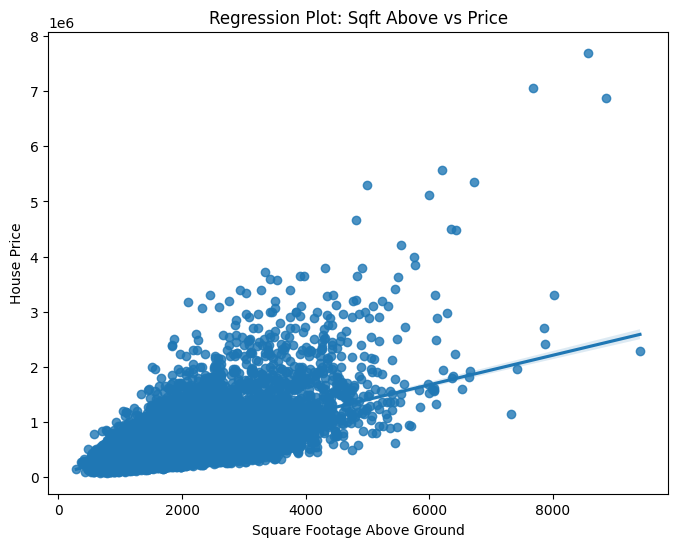

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot for sqft_above vs price
plt.figure(figsize=(8, 6))
sns.regplot(x="sqft_above", y="price", data=df)

plt.title("Regression Plot: Sqft Above vs Price")
plt.xlabel("Square Footage Above Ground")
plt.ylabel("House Price")
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression

# Define the input and output variables
X = df[['sqft_living']]
y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Calculate the R² score
r2_score = lm.score(X, y)
print("R² score:", r2_score)


R² score: 0.4928532179037931


In [11]:
from sklearn.linear_model import LinearRegression

# Define the input features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above",
            "grade", "sqft_living"]

X = df[features]
y = df["price"]

# Fit the multiple linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Calculate and display the R² score
r2_score = lm.score(X, y)
print("R² score for multiple linear regression:", r2_score)


R² score for multiple linear regression: 0.6577151058279325


In [12]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define the input features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above",
            "grade", "sqft_living"]
X = df[features]
y = df["price"]

# Create pipeline
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
]
pipe = Pipeline(Input)

# Fit pipeline and compute R²
pipe.fit(X, y)
r2_score = pipe.score(X, y)
print("R² score for polynomial regression pipeline:", r2_score)


R² score for polynomial regression pipeline: 0.7513467656307783


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Define the features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above",
            "grade", "sqft_living"]
X = df[features]
y = df["price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on training data
ridge_model.fit(X_train, y_train)

# Evaluate on test data
r2_score = ridge_model.score(X_test, y_test)
print("R² score using Ridge regression (alpha = 0.1):", r2_score)


R² score using Ridge regression (alpha = 0.1): 0.6460194468601674


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above",
            "grade", "sqft_living"]
X = df[features]
y = df["price"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create polynomial transform (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit model on polynomial transformed data
ridge_model.fit(X_train_poly, y_train)

# Evaluate R² score
r2_score = ridge_model.score(X_test_poly, y_test)
print("R² score after 2nd-order polynomial transform with Ridge(alpha=0.1):", r2_score)


R² score after 2nd-order polynomial transform with Ridge(alpha=0.1): 0.7546208829534468
